<a href="https://colab.research.google.com/github/OmkarPatkar/TheSparksFoundationInternship/blob/main/TSF_Task2_OptimumClusterPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Task # 2 - Prediction Using Unsupervised Machine Learning**

**k-means-clustering**

* This is the second task given under the internship programme of The Sparks Foundation.

**Problem Statement:**

* In this task, we have to predict the optimum number of clusters and  represent it visually From the given ‘Iris’ dataset.  

#Import libraries

In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

#Loading data

In [42]:
url = "/content/drive/My Drive/Colab Notebooks/The_Sparks_Foundation/Iris.csv"
data = pd.read_csv(url)

#Dimensions of Dataset


In [43]:
print(data.shape)

(150, 6)


#Peek at the Data


In [44]:
print(data.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


#Statistical Summary


In [45]:
print(data.describe())

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


#Class Distribution


In [46]:
print(data.groupby('Species').size())

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


**Data Visualization**

* Univariate Plots

We start with some univariate plots, that is, plots of each individual variable.

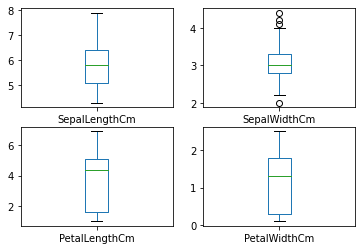

In [47]:
#box and whisker plots
datac = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
datac.plot(kind = 'box', subplots = True, layout = (2,2), sharex = False, sharey = False)
plt.show()

* create a histogram of each input variable to get an idea of the distribution.

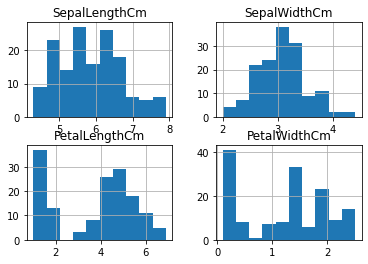

In [48]:
datac.hist()
plt.show()

It looks like perhaps two of the input variables have a Gaussian distribution.




* Multivariate Plots

Now we can look at the interactions between the variables.
This can be helpful to spot structured relationships between input variables.


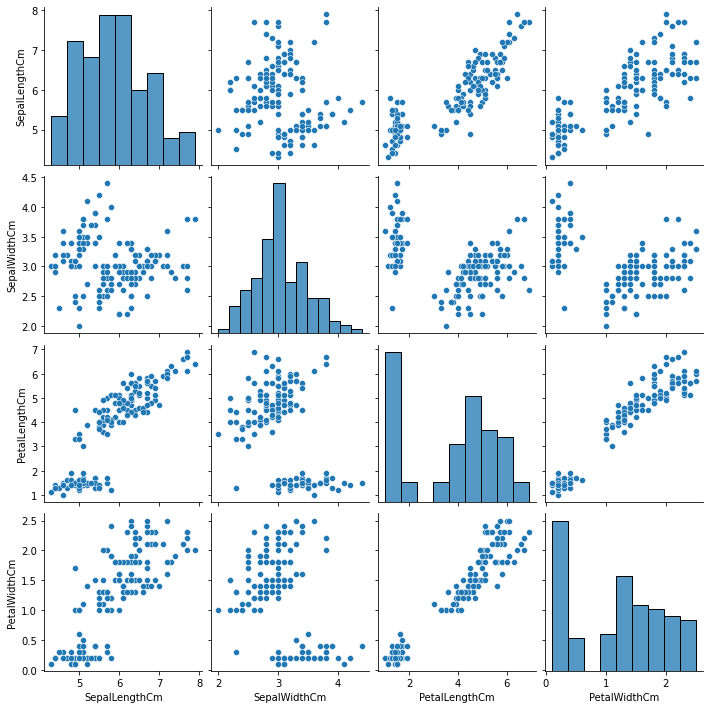

In [49]:
sns.pairplot(datac)

In [50]:
datac.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


#Let’s implement k-means using k = 5

* Let’s arbitrarily assign the value of k as 5(n_clusters).
* We will instantiate the KMeans class and assign it to the variable kmeans5:

In [51]:
kmeans5 = KMeans(n_clusters = 5)
y_kmeans5 = kmeans5.fit_predict(datac)
print(y_kmeans5)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 2 3 2 3 2 3 2 2 2 2 3 2 3 2 2 3 2 3 2 3 3
 3 3 3 3 3 2 2 2 2 3 2 3 3 3 2 2 2 3 2 2 2 2 2 3 2 2 1 3 4 1 1 4 2 4 1 4 1
 1 1 3 1 1 1 4 4 3 1 3 4 3 1 4 3 3 1 4 4 4 1 3 3 4 1 1 3 1 1 1 3 1 1 1 3 1
 1 3]


In [52]:
kmeans5.cluster_centers_

array([[5.006     , 3.418     , 1.464     , 0.244     ],
       [6.52916667, 3.05833333, 5.50833333, 2.1625    ],
       [5.53214286, 2.63571429, 3.96071429, 1.22857143],
       [6.24722222, 2.84722222, 4.775     , 1.575     ],
       [7.475     , 3.125     , 6.3       , 2.05      ]])

* There’s a method called the Elbow method, which is designed to help find the optimal number of clusters in a dataset. So let’s use this method to calculate the optimum value of k. 

* we’ll plot a graph between the number of clusters and the corresponding error value.

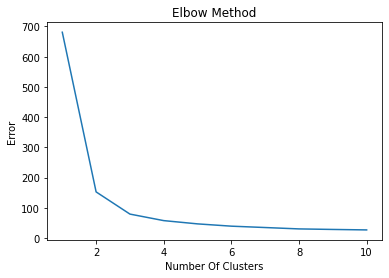

In [53]:
error = []

for i in range(1, 11):
  kmeans = KMeans(n_clusters = i).fit(datac)
  error.append(kmeans.inertia_)

#Let's plot the graph
plt.plot(range(1, 11), error)
plt.title("Elbow Method")
plt.xlabel("Number Of Clusters")
plt.ylabel("Error")
plt.show()

* The shape of elbow is approximately formed at k = 3, the optimum clusters is where the elbow occurs. 


#Let’s implement k-means again using k = 3

In [54]:
kmeans3 = KMeans(n_clusters = 3)
y_kmeans3 = kmeans3.fit_predict(datac)
print(y_kmeans3)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


In [55]:
kmeans3.cluster_centers_

array([[5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

# Plot the identified cluster

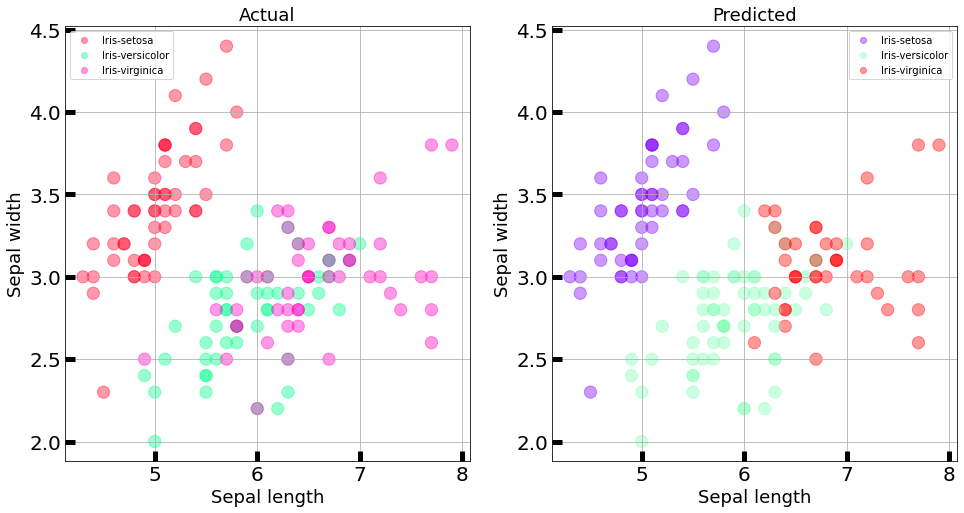

In [85]:
# Plot the identified clusters and compare with the answers
fig, axes = plt.subplots(1, 2, figsize=(16,8))

X = data.iloc[:, [1,2,3,4]].values
classes = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

from sklearn.preprocessing import LabelEncoder
encoding = LabelEncoder()
species_encoded = encoding.fit(data['Species']).transform(data['Species'])
species_encoded

actual = axes[0].scatter(X[:, 0], X[:, 1], c = species_encoded, cmap = 'gist_rainbow', alpha=0.4, s = 150)
axes[0].set_xlabel('Sepal length', fontsize = 18)
axes[0].set_ylabel('Sepal width', fontsize = 18)
axes[0].set_title('Actual', fontsize = 18)
axes[0].grid(True)
axes[0].tick_params(direction = 'in', length = 10, width = 5, colors = 'k', labelsize = 20)
axes[0].legend(handles=actual.legend_elements()[0], labels=classes, loc = 'upper left')

predicted = axes[1].scatter(X[:, 0], X[:, 1], c = y_kmeans3, cmap = 'rainbow', alpha=0.4, s = 150)
axes[1].set_xlabel('Sepal length', fontsize = 18)
axes[1].set_ylabel('Sepal width', fontsize = 18)
axes[1].set_title('Predicted', fontsize = 18)
axes[1].grid(True)
axes[1].tick_params(direction = 'in', length = 10, width = 5, colors = 'k', labelsize = 20)
axes[1].legend(handles=predicted.legend_elements()[0], labels=classes, loc = 'upper right')